In [1]:
import numpy as np
import tensorflow as tf
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
tf.enable_eager_execution()

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
class DataLoader():
    def __init__(self):
        cancer = load_breast_cancer()
        labels = (cancer.target.reshape(-1,1)).astype(np.float32)
        xtrain, xtest, ytrain, ytest = train_test_split(cancer.data, labels, test_size = 0.2, random_state = 2)
        self.train_data = xtrain
        self.train_labels = np.asarray(ytrain, dtype=np.int32) 
        self.eval_data = xtest
        self.eval_labels = np.asarray(ytest, dtype=np.int32) 

    def get_batch(self, batch_index, batch_size):
        start_index = (batch_index-1)*batch_size + 1
        end_index = batch_index * batch_size
        return self.train_data[start_index:end_index, :], self.train_labels[start_index:end_index]

In [3]:
D = DataLoader()
X = D.train_data
print(X.shape)

(455, 30)


In [4]:
class MLP(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.dense1 = tf.keras.layers.Dense(units=30, activation=tf.nn.sigmoid)
        self.dense2 = tf.keras.layers.Dense(units=20, activation=tf.nn.sigmoid)
        self.dense3 = tf.keras.layers.Dense(units = 1,  activation=tf.nn.sigmoid)

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return x
    
    def predict(self, inputs):
        logits = self(inputs)
        return tf.round(logits)


In [5]:
num_batches = 5
batch_size = 91
learning_rate = 0.002
num_epochs = 1000

In [6]:
tf.set_random_seed(2)
model = MLP()
data_loader = DataLoader()
optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate)

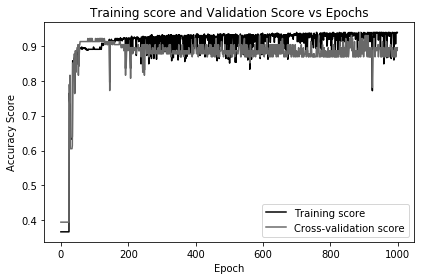

In [7]:
train_acc_array = []
validation_acc_array = []
for epoch in range(num_epochs):
    for batch_index in range(num_batches):
        X, y = data_loader.get_batch(batch_index,batch_size)
        with tf.GradientTape() as tape:
            y_logit_pred = model(tf.convert_to_tensor(X))
            loss = tf.losses.sigmoid_cross_entropy(y, y_logit_pred)
            grads = tape.gradient(loss, model.variables)
            optimizer.apply_gradients(grads_and_vars=zip(grads, model.variables))
            
    num_train_samples = np.shape(data_loader.train_labels)[0]
    num_eval_samples = np.shape(data_loader.eval_labels)[0]
    
    y_pred_train = model.predict(data_loader.train_data).numpy()
    y_pred_eval = model.predict(data_loader.eval_data).numpy()
    train_acc = (sum(y_pred_train == data_loader.train_labels) / num_train_samples)
    validation_acc = (sum(y_pred_eval == data_loader.eval_labels) / num_eval_samples)

    train_acc_array.append(train_acc) 
    validation_acc_array.append(validation_acc) 

plt.plot(train_acc_array, label="Training score", color="black")
plt.plot(validation_acc_array, label="Cross-validation score", color="dimgrey")
plt.title("Training score and Validation Score vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [8]:
num_train_samples = np.shape(data_loader.train_labels)[0]
y_pred = model.predict(data_loader.train_data).numpy()
print("train accuracy: %f" % (sum(y_pred == data_loader.train_labels) / num_train_samples))
num_eval_samples = np.shape(data_loader.eval_labels)[0]
y_pred = model.predict(data_loader.eval_data).numpy()
print("test accuracy: %f" % (sum(y_pred == data_loader.eval_labels) / num_eval_samples))

train accuracy: 0.938462
test accuracy: 0.894737
